In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Prepare data for models
from surprise import Dataset, Reader

#Seperate data into train and test set
from surprise.model_selection.split import train_test_split

#Selected Model
from surprise.prediction_algorithms.matrix_factorization import SVD

#Parameter Selection Metric (RMSE)
from surprise.accuracy import rmse

In [2]:
df = pd.read_csv("/Users/grace/Documents/Recommender System/Data/DataSet.csv", index_col=0)

/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df

,user_id,book_id,rating
0,2886,1,5
1,6158,1,5
2,3991,1,4
3,5281,1,5
4,5721,1,5
...,...,...,...
5916161,35336,10000,4
5916162,17999,10000,3
5916163,49007,10000,4
5916164,43319,10000,5


In [4]:
#Prepare data for models
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df, reader)

In [5]:
#create training set and test set
train_set, test_set = train_test_split(data, test_size=0.2, random_state=0)

In [6]:
# Baseline Model Selected
algo6 =SVD() 
algo6.fit(train_set)
predictions6 = algo6.test(test_set)
SVD_rmse = rmse(predictions6) #0.8286

RMSE: 0.8286


In [7]:
epochs = [5,10,15,20,25,30,35] #20 is best

mse_epochs =[]

for i in epochs:
    alg = SVD(n_epochs=i)
    alg.fit(train_set)
    pred = alg.test(test_set)
    epoch_mse = rmse(pred)
    mse_epochs.append(epoch_mse)
    print(i)

RMSE: 0.8567
5
RMSE: 0.8454
10
RMSE: 0.8340
15
RMSE: 0.8288
20
RMSE: 0.8298
25
RMSE: 0.8334
30
RMSE: 0.8380
35


Text(0, 0.5, 'RMSE')

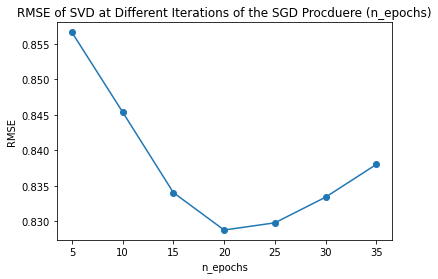

In [20]:
plt.plot('eppoch','mse',marker='o', data=pd.DataFrame({"eppoch":epochs, "mse":mse_epochs}))
plt.title("RMSE of SVD at Different Iterations of the SGD Procduere (n_epochs)")
plt.xlabel("n_epochs")
plt.ylabel("RMSE")

In [21]:
rate = [0.005,0.006,0.007,0.008] #0.005  is ideal
mse_rate = []
for i in rate:
    alg=SVD(lr_all=i)
    alg.fit(train_set)
    pred = alg.test(test_set)
    rmse_rate = rmse(pred)
    mse_rate.append(rmse_rate)
    print(i)
    

RMSE: 0.8288
0.005
RMSE: 0.8293
0.006
RMSE: 0.8316
0.007
RMSE: 0.8341
0.008


Text(0, 0.5, 'RMSE')

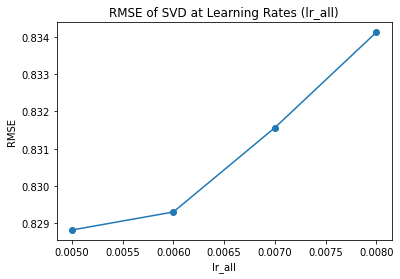

In [22]:
plt.plot('rate','mse',marker='o', data=pd.DataFrame({"rate":rate, "mse":mse_rate}))
plt.title("RMSE of SVD at Learning Rates (lr_all)")
plt.xlabel("lr_all")
plt.ylabel("RMSE")

In [24]:
reg = [0.02,0.03,0.04]
mse_reg2=[]

for i in reg:
    alg = SVD(reg_all=i, lr_all=0.006)
    alg.fit(train_set)
    pred = alg.test(test_set)
    mse_regs = rmse(pred)
    mse_reg2.append(mse_reg)
    print(i)

RMSE: 0.8292
0.02
RMSE: 0.8220
0.03
RMSE: 0.8234
0.04


Text(0, 0.5, 'RMSE')

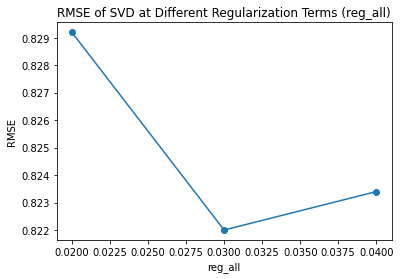

In [31]:
plt.plot('reg','mse',marker='o', data=pd.DataFrame({"reg":reg, "mse":mse_reg2}))
plt.title("RMSE of SVD at Different Regularization Terms (reg_all)")
plt.xlabel("reg_all")
plt.ylabel("RMSE")

In [44]:
#SVD Model Selected
algorithm = SVD(reg_all=0.03, lr_all=0.006)